Consider a string of length $L$ stretched to tension $T$, carrying $N$ beads of mass $m$, each equally spaced distance $a$ apart.

$$
\begin{align*}
& \quad\quad \quad \quad\;\; \longleftarrow  a \longrightarrow \\
& \quad \quad \quad \quad \quad y_1 \quad\quad \; y_2 \quad \quad \quad \quad \quad \quad y_N \\
& \quad\quad\quad\quad \;\;\; \uparrow \quad \;\;\; \quad\uparrow \quad \quad \quad \quad \; \quad \quad \uparrow \\
& \boxed{\phantom{aaaa}} == m_1  ==  m_2  ==  \cdots == m_N == \boxed{\phantom{aaaa}} \\
& \quad \quad \;\;\;  <------ L ------>
\end{align*}
$$

Compiling various index and variable definitions to avoid confusion, 
$$
\begin{array}{llcll}
j & \text{mass index (1,2,3$\cdots$N)} & & \omega_A & \sqrt{\frac{2T}{ma}} \\
n & \text{mode index (1,2,3$\cdots$N)} & & L & \text{string length} \\
N & \text{number of total beads} & & T & \text{tension on string} \\
\omega_n & \text{angular frequency of mode n} & & m & \text{bead mass} \\
Y_j & \text{amplitude of bead } j & & a & \text{seperation between beads} \\
\end{array}
$$

Both ends are fixed, so $y_0 = y_{N+1} = 0$. Assuming small vertical displacements of each bead relative to its neighbors ($y_j - y_{j-1} << a$), we use Newton's second law to get the equation of motion for the $j^{th}$ bead (isomorphic to a system of identical masses coupled by identical springs in `N-CoupledChain.ipynb`):
$$
\sum F_y = m\ddot{y_j} = -\frac{T}{a}(y_j - y_{j-1} + y_j - y_{j+1})  \Longrightarrow \ddot{y_j} = -\frac{T}{ma}(-y_{j-1}  + 2 y_j - y_{j+1})
$$


This leads to a system of N coupled differential equations, and the solution takes the form
$$
|y(t)\rangle = \begin{bmatrix} y_1(t) \\ y_2(t) \\ \vdots \end{bmatrix} = \text{Re} \left[ \sum_{n=1}^N C_n e^{i \omega_n t} |e_n\rangle\right] ,\text{ where } |e_n\rangle = A_n\begin{bmatrix} \sin k_n x_1  \\ \sin k_n x_2  \\ \vdots \end{bmatrix}
$$
Normalizing, 
$$
\langle e_n | e_n \rangle = 1 \Longrightarrow A_n^* \begin{bmatrix} \sin k_n x_1  & \sin k_n x_2  & \cdots \end{bmatrix}A_n \begin{bmatrix} \sin k_n x_1  \\ \sin k_n x_2  \\ \vdots \end{bmatrix} = 1 \Longrightarrow |A_n|^2 = \frac{1}{\sum_{j=1}^N \sin^2 k_n x_j} = \frac{1}{\frac{N+1}{2}} 
$$
As $A_n ∈ \mathbb{R}$, 
$$
A_n = \sqrt{\frac{2}{N+1}} \Longrightarrow |e_n\rangle = \sqrt{\frac{2}{N+1}}\begin{bmatrix} \sin(k_n x_1) \\ \sin(k_n x_2) \\ \vdots \end{bmatrix}
$$
As for the other components, 

$$
\begin{array}{llcll}
\text{Re} C_n & \langle e_n | y_0 \rangle & & \omega_n & \sqrt{2} \omega_A \sin \left( \frac{n \pi a}{2L}\right) \\
\text{Im} C_n & \frac{-1}{\omega_n} \langle e_n | \dot{y_0} \rangle & & \omega_A  & \sqrt{\frac{2T}{ma}} \\
L & (N + 1) a & & k_n & \frac{n\pi}{L} \\
\end{array}
$$

These equations are connected using the following flow:

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


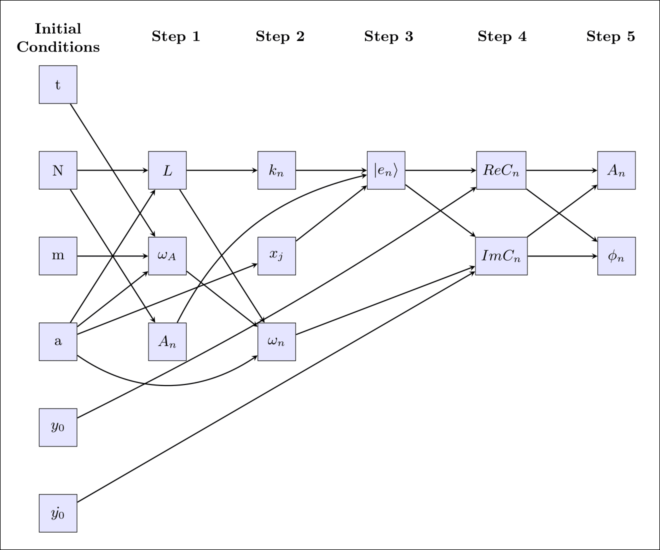

In [28]:
using Pkg; Pkg.add("Images"); Pkg.add("FileIO"); using Images; using FileIO
img_path = "/Users/kahaan/Desktop/Computational Physics/PendulumSolvers.jl/images/flowchart.png"; img = load(img_path); display(img)

Before generalizing to N beads, we implement these equations for a 3 bead system:

In [11]:
import Pkg; Pkg.add("SymPy")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [5]:
using LinearAlgebra
using SymPy

@vars t real=true
t = 0

# Initial Conditions
N = 3
m = 1
a = 1
T = 100 
y₀ = [-2.55033, 3.51028, -0.885746]
v₀ = [-35.8043, 1.38233, 15.6333]

# Step 1
L = (N + 1) * a                          
ωₐ = √((2 * T) / (m * a))                
Aₙ = √(2 / (N + 1))                         

# Step 2
k₁ = 1 * π / L;  x₁ = 1 * a;  ω₁ = √2 * ωₐ * sin(1 * π * a / (2 * L))                            
k₂ = 2 * π / L;  x₂ = 2 * a;  ω₂ = √2 * ωₐ * sin(2 * π * a / (2 * L))                      
k₃ = 3 * π / L;  x₃ = 3 * a;  ω₃ = √2 * ωₐ * sin(3 * π * a / (2 * L))                          
 
# Step 3
e₁₁ = Aₙ * sin(k₁ * x₁);  e₂₁ = Aₙ * sin(k₂ * x₁);  e₃₁ = Aₙ * sin(k₃ * x₁)
e₁₂ = Aₙ * sin(k₁ * x₂);  e₂₂ = Aₙ * sin(k₂ * x₂);  e₃₂ = Aₙ * sin(k₃ * x₂)
e₁₃ = Aₙ * sin(k₁ * x₃);  e₂₃ = Aₙ * sin(k₂ * x₃);  e₃₃ = Aₙ * sin(k₃ * x₃)

e = [e₁₁ e₂₁ e₃₁
     e₁₂ e₂₂ e₃₂
     e₁₃ e₂₃ e₃₃]

e₁ = e[:,1]; e₂ = e[:,2];  e₃ = e[:,3]

# Step 4
ReC₁ = dot(e₁, y₀);  ImC₁ = (-1 / ω₁) * dot(e₁, v₀) 
ReC₂ = dot(e₂, y₀);  ImC₂ = (-1 / ω₂) * dot(e₂, v₀)
ReC₃ = dot(e₃, y₀);  ImC₃ = (-1 / ω₃) * dot(e₃, v₀)

# Step 5
A₁ = √(ReC₁^2 + ImC₁^2);  ϕ₁ = atan(ImC₁, ReC₁)   
A₂ = √(ReC₂^2 + ImC₂^2);  ϕ₂ = atan(ImC₂, ReC₂)
A₃ = √(ReC₃^2 + ImC₃^2);  ϕ₃ = atan(ImC₃, ReC₃)

# Rounding output as needed
☐ = 3
A = round(A₁ * e[1,1], digits = ☐);  B = round(A₂ * e[1,2], digits = ☐);  C = round(A₃ * e[1,3], digits = ☐)
D = round(A₁ * e[2,1], digits = ☐);  E = round(A₂ * e[2,2], digits = ☐);  F = round(A₃ * e[2,3], digits = ☐)
G = round(A₁ * e[3,1], digits = ☐);  H = round(A₂ * e[3,2], digits = ☐);  I = round(A₃ * e[3,3], digits = ☐)

ω1 = round(ω₁, digits = ☐);  ϕ1 = round(ϕ₁, digits = ☐)
ω2 = round(ω₂, digits = ☐);  ϕ2 = round(ϕ₂, digits = ☐)
ω3 = round(ω₃, digits = ☐);  ϕ3 = round(ϕ₃, digits = ☐)

println("y₁(t) = ",A," cos(",ω1,"t + ",ϕ1,") + ",B," cos(",ω2,"t + ",ϕ2,") + ",C," cos(",ω3,"t + ",ϕ3,")")
println("y₂(t) = ",D," cos(",ω1,"t + ",ϕ1,") + ",E," cos(",ω2,"t + ",ϕ2,") + ",F," cos(",ω3,"t + ",ϕ3,")")
println("y₃(t) = ",G," cos(",ω1,"t + ",ϕ1,") + ",H," cos(",ω2,"t + ",ϕ2,") + ",I," cos(",ω3,"t + ",ϕ3,")")

y₁(t) = A₁ * e[1,1] * cos(ω₁ * t + ϕ₁) + A₂ * e[1,2] * cos(ω₂ * t + ϕ₂) + A₃ * e[1,3] * cos(ω₃ * t + ϕ₃)
y₂(t) = A₁ * e[2,1] * cos(ω₁ * t + ϕ₁) + A₂ * e[2,2] * cos(ω₂ * t + ϕ₂) + A₃ * e[2,3] * cos(ω₃ * t + ϕ₃)
y₃(t) = A₁ * e[3,1] * cos(ω₁ * t + ϕ₁) + A₂ * e[3,2] * cos(ω₂ * t + ϕ₂) + A₃ * e[3,3] * cos(ω₃ * t + ϕ₃)

♢ = 6
println("\nAt t(",t,"),")
println("y₁(0): ", round(y₁(t), digits = ♢))
println("y₂(0): ", round(y₂(t), digits = ♢))
println("y₃(0): ", round(y₃(t), digits = ♢))
println("These calculated values are identical to the given initial positions.")

y₁(t) = 0.707 cos(7.654t + 1.0) + 2.0 cos(14.142t + 2.0) + 2.121 cos(18.478t + 3.0)
y₂(t) = 1.0 cos(7.654t + 1.0) + 0.0 cos(14.142t + 2.0) + -3.0 cos(18.478t + 3.0)
y₃(t) = 0.707 cos(7.654t + 1.0) + -2.0 cos(14.142t + 2.0) + 2.121 cos(18.478t + 3.0)

At t(0),
y₁(0): -2.55033
y₂(0): 3.51028
y₃(0): -0.885746
These calculated values are identical to the given initial positions.
